In [ ]:
# Load train dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load train and test dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Apply or between 'Death' and 'Transplantation' columns due to the fact would probably died if not applied transplant
train['Death'] = train['Death'] | train['Transplantation']
train = train.drop('Transplantation', axis=1)
test['Death'] = test['Death'] | test['Transplantation']
test = test.drop('Transplantation', axis=1)

# Save new train and test datasets
train.to_csv('data/train_2y.csv', index=False)
test.to_csv('data/test_2y.csv', index=False)

# Delete column 'RadioWorsening2y'

train = train.drop('RadioWorsening2y', axis=1)
test = test.drop('RadioWorsening2y', axis=1)

# Save new train and test datasets
train.to_csv('data/train_1y.csv', index=False)
test.to_csv('data/test_1y.csv', index=False)

# Delete columns 'FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'DLCO (%) 1 year after diagnosis'

train = train.drop(['FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'DLCO (%) 1 year after diagnosis'], axis=1)
test = test.drop(['FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'DLCO (%) 1 year after diagnosis'], axis=1)

# Save new train and test datasets
train.to_csv('data/train_0y.csv', index=False)
test.to_csv('data/test_0y.csv', index=False)

# NEW TEST

In [22]:
# Concat all test and split again with 0.2 ratio

train_0y = pd.read_csv('../data/train_0y.csv')
test_0y = pd.read_csv('../data/test_0y.csv')
# Concat all test and split again with 0.2 ratio
train = pd.concat([train_0y, test_0y], axis=0)
test = train.sample(frac=0.2)
train = train.drop(test.index)

# Save new train and test datasets
train.to_csv('../data/train_0y.csv', index=False)
test.to_csv('../data/test_0y.csv', index=False)


# Same for 1y

train_1y = pd.read_csv('../data/train_1y.csv')
test_1y = pd.read_csv('../data/test_1y.csv')
# Concat all test and split again with 0.2 ratio
train = pd.concat([train_1y, test_1y], axis=0)
test = train.sample(frac=0.2)
train = train.drop(test.index)

# Save new train and test datasets
train.to_csv('../data/train_1y.csv', index=False)
test.to_csv('../data/test_1y.csv', index=False)


# Same for 2y

train_2y = pd.read_csv('../data/train_y2.csv')
test_2y = pd.read_csv('../data/test_y2.csv')
# Concat all test and split again with 0.2 ratio
train = pd.concat([train_2y, test_2y], axis=0)
test = train.sample(frac=0.2)
train = train.drop(test.index)

# Save new train and test datasets
train.to_csv('../data/train_2y.csv', index=False)
test.to_csv('../data/test_2y.csv', index=False)

# TRAIN MODELS

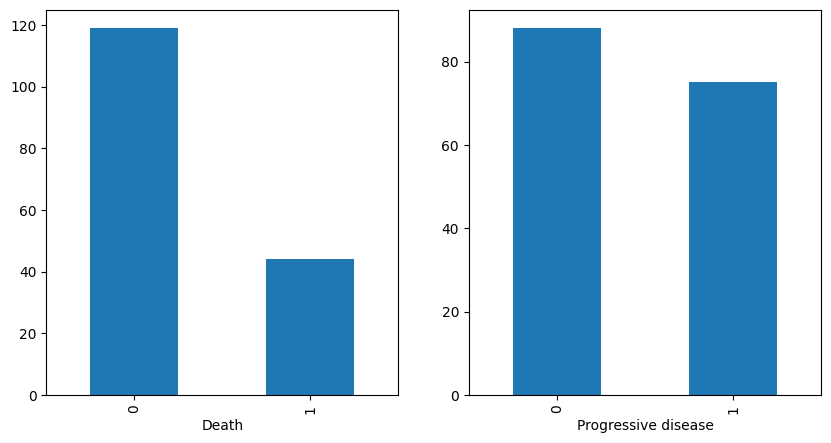

In [24]:
# Plot of death columns and progressive disease

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
train['Death'].value_counts().plot(kind='bar', ax=ax[0])
train['Progressive disease'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

In [1]:
from tabpfn import TabPFNClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

train = pd.read_csv('../data/train_0y.csv')
test = pd.read_csv('../data/test_0y.csv')

# Separate features (X) and targets (y) for both cases
X_train = train.drop(columns=['Death', 'Progressive disease'])
y_train_death = train['Death']
y_train_progressive = train['Progressive disease']

X_test = test.drop(columns=['Death', 'Progressive disease'])
y_test_death = test['Death']
y_test_progressive = test['Progressive disease']

# Initialize TabPFN for Death Prediction
model_death = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
model_death.fit(X_train, y_train_death)
y_pred_death = model_death.predict(X_test)

# Evaluate Death Prediction
print("Death Prediction Report:")
print(classification_report(y_test_death, y_pred_death))
print("Accuracy Score (Death):", accuracy_score(y_test_death, y_pred_death))

# Initialize TabPFN for Progressive Disease Prediction
model_progressive = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
model_progressive.fit(X_train, y_train_progressive)
y_pred_progressive = model_progressive.predict(X_test)

# Evaluate Progressive Disease Prediction
print("\nProgressive Disease Prediction Report:")
print(classification_report(y_test_progressive, y_pred_progressive))
print("Accuracy Score (Progressive Disease):", accuracy_score(y_test_progressive, y_pred_progressive))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tabpfn/scripts/model_builder.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state

Death Prediction Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        37
           1       0.44      0.57      0.50         7

    accuracy                           0.82        44
   macro avg       0.68      0.72      0.69        44
weighted avg       0.84      0.82      0.83        44

Accuracy Score (Death): 0.8181818181818182


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)



Progressive Disease Prediction Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69        29
           1       0.44      0.53      0.48        15

    accuracy                           0.61        44
   macro avg       0.59      0.59      0.59        44
weighted avg       0.63      0.61      0.62        44

Accuracy Score (Progressive Disease): 0.6136363636363636


# Load death and prog models for y0

In [5]:
import lightgbm as lgb

# Route to save models
death_model_route = 'model_weights/death_model_y0.txt'
progressive_model_route = 'model_weights/prog_model_y0.txt'

# Load the models
death_model = lgb.Booster(model_file=death_model_route)
progressive_model = lgb.Booster(model_file=progressive_model_route)

Loaded Model Accuracy: 0.8636363636363636
Loaded Model Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.56      0.71      0.63         7

    accuracy                           0.86        44
   macro avg       0.75      0.80      0.77        44
weighted avg       0.88      0.86      0.87        44

Confusion Matrix:
 [[33  4]
 [ 2  5]]


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


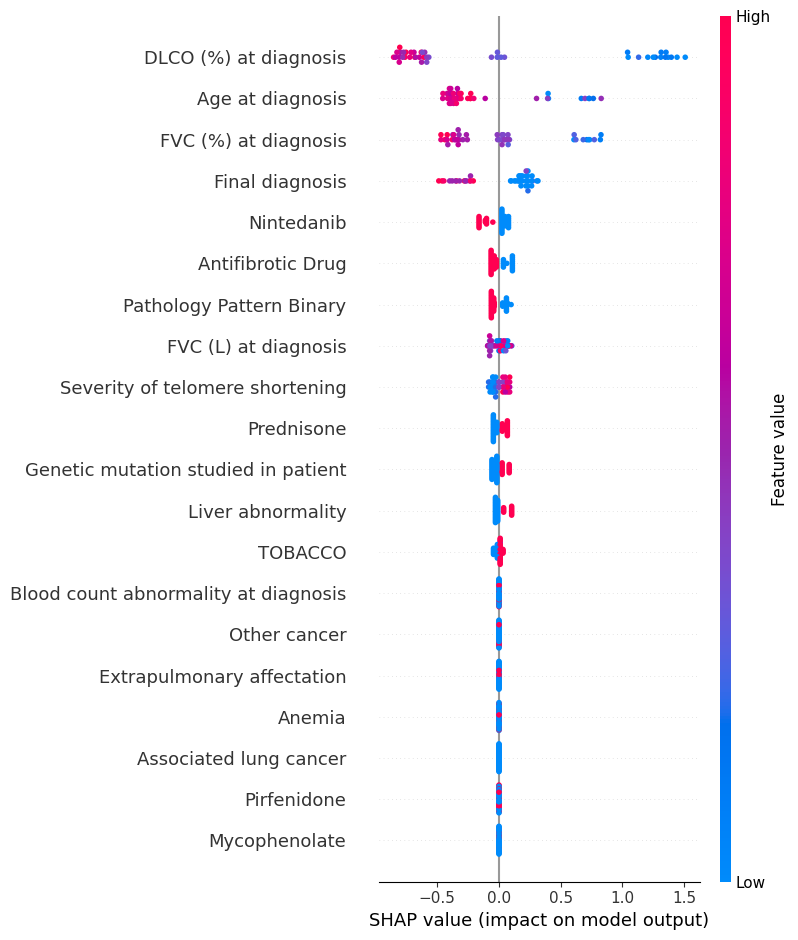

New Model Accuracy: 0.8181818181818182
New Model Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89        37
           1       0.44      0.57      0.50         7

    accuracy                           0.82        44
   macro avg       0.68      0.72      0.69        44
weighted avg       0.84      0.82      0.83        44

Confusion Matrix (New Model):
 [[32  5]
 [ 3  4]]


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


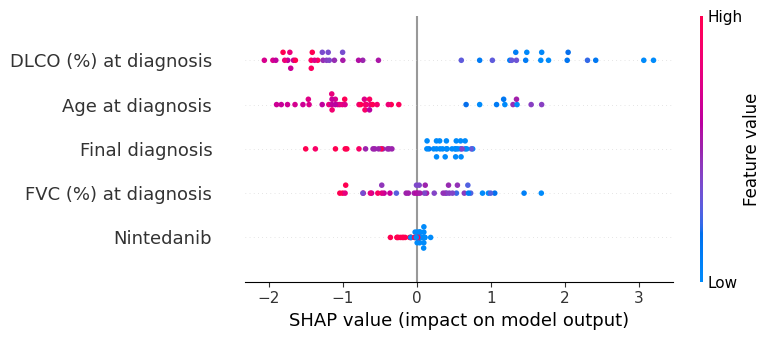

In [13]:
import lightgbm as lgb
import shap
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load models
model_route = 'model_weights/death_model_y0.txt'
model = lgb.Booster(model_file=model_route)

# Load datasets
X_train = pd.read_csv('../data/train_0y.csv')
X_test = pd.read_csv('../data/test_0y.csv')
y_train = X_train['Death']
y_test = X_test['Death']

# Drop Death and Progressive Disease columns
X_train = X_train.drop(columns=['Death', 'Progressive disease'])
X_test = X_test.drop(columns=['Death', 'Progressive disease'])

# Evaluate the loaded model
# Predict probabilities and apply threshold
probs = model.predict(X_test)
y_pred = (probs >= 0.5).astype(int)

print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred))
print("Loaded Model Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# SHAP for global and local explanations
explainer = shap.TreeExplainer(model)

# Global SHAP analysis
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)  # Summary plot for class 1

# Explain a single instance (waterfall plot)
instance_index = 0  # Choose the instance to explain
instance = X_test.iloc[[instance_index]]

# Save waterfall plot correctly
shap_values_instance = shap.Explanation(
    values=shap_values[1][instance_index],
    base_values=explainer.expected_value[1],
    data=instance.iloc[0]
)
shap.plots.waterfall(shap_values_instance, show=False)
plt.savefig("patient.png", bbox_inches="tight", dpi=300)
plt.close()

# Train a simplified model using top-k important features
mean_shap_importance = np.abs(shap_values[1]).mean(axis=0)
feature_importance = pd.DataFrame({'feature': X_test.columns, 'importance': mean_shap_importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
k = 5
top_k_features = feature_importance.head(k)['feature'].tolist()

X_train_top_k = X_train[top_k_features]
X_test_top_k = X_test[top_k_features]

# Train a new model
new_model = lgb.LGBMClassifier(verbosity=-1)
new_model.fit(X_train_top_k, y_train)

# Evaluate the new model
new_probs = new_model.predict_proba(X_test_top_k)[:, 1]
new_y_pred = (new_probs >= 0.5).astype(int)

print("New Model Accuracy:", accuracy_score(y_test, new_y_pred))
print("New Model Report:\n", classification_report(y_test, new_y_pred))
print("Confusion Matrix (New Model):\n", confusion_matrix(y_test, new_y_pred))

# SHAP for the new model (optional)
explainer_new = shap.TreeExplainer(new_model)
shap_values_new = explainer_new.shap_values(X_test_top_k)
shap.summary_plot(shap_values_new[1], X_test_top_k)
